In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap.umap_ as umap
from sklearn.decomposition import PCA
import pandas as pd


%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

In [47]:
Data = pd.read_csv("ClinicalInformation.tsv", sep="\t")

In [48]:
Data.head()

,Subject,Sex(F/M),Age,Diameter,Position,Label,Location,"Composition(Solid,pSolid,pCystic,Cyst)","Echogenicity(MarkedHypo,MildHypo,Isoecho,Hyperecho)",MicroCalcification(None/Presence),MacroCalcification(None/Presence),RimCalcification(None/Presence),"Margin(Smooth,Spiculated,illDefined)","Shape(Parallel,nonParallel)",Spongiform(None/Presence),TailArtifact(None/Presence),TIRADS_Score
0,001-0001-1,2,21,11,R,1,2,2,2,1,1,1,1,1,1,1,3
1,001-0002-1,1,32,11,R,0,3,1,3,1,1,1,1,1,1,1,3
2,001-0003-1,1,54,13,R,0,2,2,3,1,1,1,3,1,1,1,3
3,001-0004-1,1,46,11,R,0,2,2,3,1,1,1,1,2,2,1,2
4,001-0005-1,1,43,16,R,0,2,1,3,1,1,1,1,1,1,1,3


In [49]:
import pandas as pd
from sklearn.datasets import load_iris # scikit-learn의 샘플 데이터 로드를 위해 import
from sklearn.preprocessing import LabelEncoder

# categorize output class labels to numeric values
le = LabelEncoder()
le.fit(Data['Position'])
Data['Position'] = le.transform(Data['Position'])

In [50]:
Data['Position']

0      2
1      2
2      2
3      2
4      2
      ..
160    2
161    1
162    1
163    1
164    2
Name: Position, Length: 165, dtype: int32

In [44]:
ColumnIndex = ['Sex(F/M)', 'Age', 'Diameter', 'Position', 'Location', 'Composition(Solid,pSolid,pCystic,Cyst)', 'Echogenicity(MarkedHypo,MildHypo,Isoecho,Hyperecho)', 'MicroCalcification(None/Presence)', 'MacroCalcification(None/Presence)', 'RimCalcification(None/Presence)', 'Margin(Smooth,Spiculated,illDefined)', 'Shape(Parallel,nonParallel)', 'Spongiform(None/Presence)', 'TailArtifact(None/Presence)', 'TIRADS_Score']

In [45]:
Data_withoutLabel = Data[ColumnIndex]

In [46]:
Data.columns

fit = umap.UMAP()
%time u = fit.fit_transform(Data_withoutLabel)

CPU times: total: 15.2 s
Wall time: 24.2 s


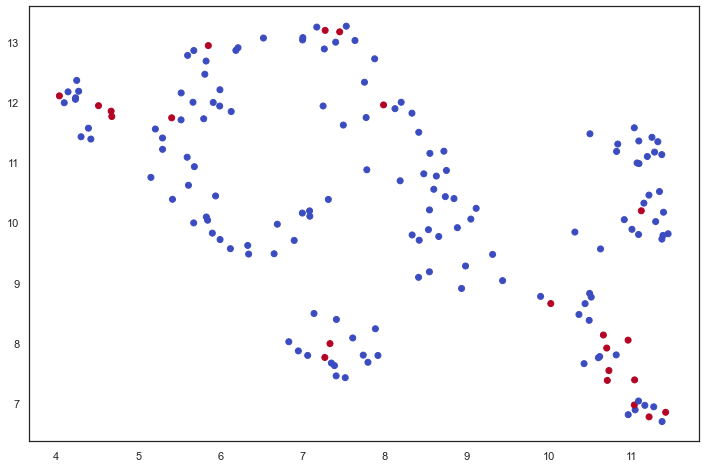

In [51]:
plt.scatter(u[:,0], u[:,1], c=Data['Label'], cmap='coolwarm')